## Natural Language Processing (NLP)

In [1]:
import nltk

In [5]:
#nltk.download_shell()

In [9]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [10]:
print(len(messages))

5574


In [11]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

**Corpus**: a collection of texts (or documents). 

In [14]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message, '\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

1 ham	Ok lar... Joking wif u oni... 

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

3 ham	U dun say so early hor... U c already then say... 

4 ham	Nah I don't think he goes to usf, he lives around here though 

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv 

6 ham	Even my brother is not like to speak with me. They treat me like aids patent. 

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune 

8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [16]:
import pandas as pd

In [21]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label','message'])

In [22]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [25]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [27]:
messages['length'] = messages['message'].apply(len)

In [28]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### EDA

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

<AxesSubplot:>

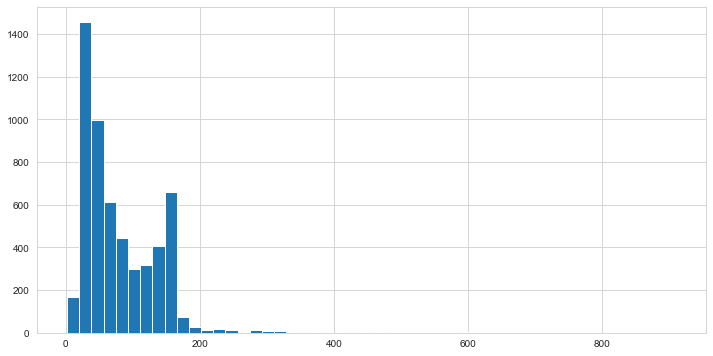

In [44]:
plt.figure(figsize=(12,6))
messages['length'].hist(bins=50)

(0.0, 500.0)

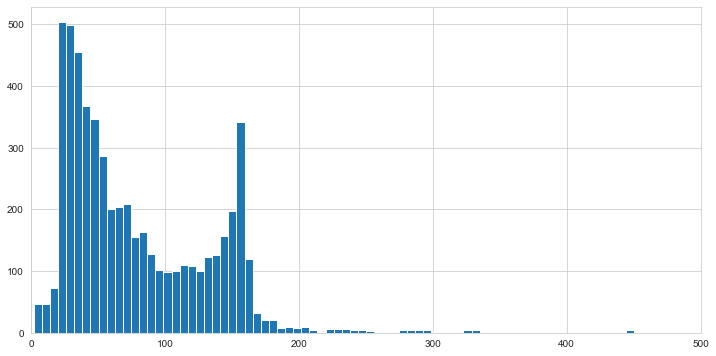

In [42]:
plt.figure(figsize=(12,6))
messages['length'].hist(bins=150)
plt.xlim([0,500])

In [45]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [56]:
messages[messages['length'] == 910.0]['message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object

In [57]:
messages[messages['length'] == 910.0]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

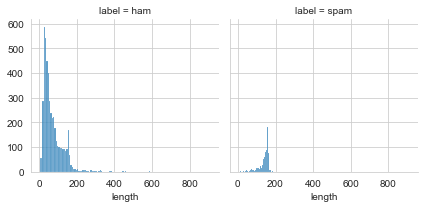

In [69]:
g = sns.FacetGrid(messages, col='label')
g.map(sns.histplot, 'length')

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

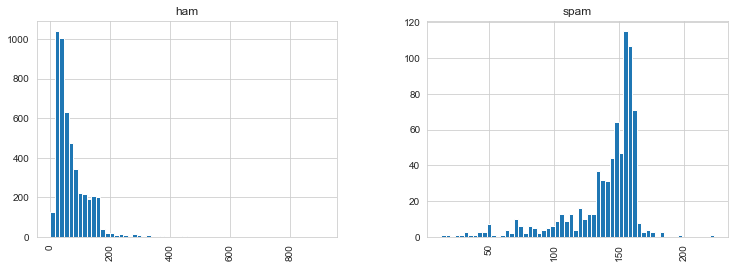

In [72]:
messages.hist(column='length', by='label', bins=60, figsize=(12,4))

### Text Pre-processing

- Convert a sequence of words into vectors.
- Remove very common words, a, the etc., also known as **stopwords**.

In [73]:
import string

In [75]:
mess = 'Sample message! Notice: it has punctuation.'

In [76]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [112]:
nopunc = [c for c in mess if c not in string.punctuation]
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

To join the characters back to words.

In [107]:
nopunc = ''.join(nopunc)
nopunc

'Sample message Notice it has punctuation'

In [108]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In the quotation marks `''` we put the concatenation device. If nothing, put `''` but if, for example, you want an underscore put `'_'`.

In [98]:
x = 'a b c d'.split()
x

['a', 'b', 'c', 'd']

In [91]:
''.join(x)

'abcd'

In [92]:
'_'.join(x)

'a_b_c_d'

In [94]:
'++'.join(x)

'a++b++c++d'

In [80]:
from nltk.corpus import stopwords

In [84]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [110]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [120]:
def text_process(mess):
    """Pre-process a text for NLP.

    1. Remove punctuation.
    2. Remove stopwords.
    3. Return list of clean text words.

    Args:
        mess (string): The message to be processed.

    Returns:
        list: The list containing all the interesting words in the input message.
    """
    nopunc = [c.lower() for c in mess if c not in string.punctuation]
    nopunc = ''.join(nopunc).split()
    stop = stopwords.words('english')
    clean_mess = [word for word in nopunc if word not in stop]
    return clean_mess

In [121]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


We are going to *tokenize* the messages.

In [123]:
messages['message'].head(3).apply(text_process)

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
Name: message, dtype: object

Messages are now a list of tokens. We now need to convert these into vectors for scikit-learn, the process known as **vectorization**.

### Vectorization

Now we'll convert each message, represented as a list of tokens above, into a vector that machine learning models can understand.

We'll do that in three steps using the **bag-of-words** model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [124]:
from sklearn.feature_extraction.text import CountVectorizer

In [127]:
messages

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [128]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [130]:
bow_transformer.vocabulary_

{'go': 3786,
 'jurong': 4696,
 'point': 6445,
 'crazy': 2485,
 'available': 1389,
 'bugis': 1860,
 'n': 5686,
 'great': 3883,
 'world': 9208,
 'la': 4858,
 'e': 3016,
 'buffet': 1858,
 'cine': 2200,
 'got': 3843,
 'amore': 1156,
 'wat': 8969,
 'ok': 6006,
 'lar': 4897,
 'joking': 4664,
 'wif': 9103,
 'u': 8626,
 'oni': 6038,
 'free': 3571,
 'entry': 3152,
 '2': 416,
 'wkly': 9160,
 'comp': 2316,
 'win': 9117,
 'fa': 3290,
 'cup': 2541,
 'final': 3415,
 'tkts': 8398,
 '21st': 436,
 'may': 5345,
 '2005': 423,
 'text': 8233,
 '87121': 849,
 'receive': 6848,
 'questionstd': 6738,
 'txt': 8610,
 'ratetcs': 6791,
 'apply': 1242,
 '08452810075over18s': 72,
 'dun': 3002,
 'say': 7208,
 'early': 3023,
 'hor': 4219,
 'c': 1910,
 'already': 1129,
 'nah': 5693,
 'dont': 2907,
 'think': 8309,
 'goes': 3800,
 'usf': 8760,
 'lives': 5060,
 'around': 1293,
 'though': 8328,
 'freemsg': 3579,
 'hey': 4114,
 'darling': 2605,
 '3': 527,
 'weeks': 9023,
 'word': 9194,
 'back': 1442,
 'id': 4340,
 'like': 5

In [129]:
print(len(bow_transformer.vocabulary_))

9530


In [133]:
mess4 = messages['message'][3]
mess4

'U dun say so early hor... U c already then say...'

In [135]:
bow4 = bow_transformer.transform([mess4])
bow4

<1x9530 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [136]:
print(bow4)

  (0, 1129)	1
  (0, 1910)	1
  (0, 3002)	1
  (0, 3023)	1
  (0, 4219)	1
  (0, 7208)	2
  (0, 8626)	2


In [138]:
print(bow4.shape)

(1, 9530)


In [141]:
bow_transformer.get_feature_names()[7208]

'say'

In [142]:
bow_transformer.get_feature_names()[8626]

'u'

In [143]:
messages_bow = bow_transformer.transform(messages['message'])

In [145]:
print('Shape of sparse matrix:', messages_bow.shape)

Shape of sparse matrix: (5572, 9530)


In [146]:
messages_bow.nnz # non-zeroes

50101

In [152]:
sparsity = 100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])
# actually that is the density, the complement of sparsity
print('Sparsity: {0:.4f}'.format(sparsity)) 

Sparsity: 0.0944


In [153]:
from sklearn.feature_extraction.text import TfidfTransformer

In [156]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [158]:
tfidf4 = tfidf_transformer.transform(bow4)

<1x9530 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [159]:
print(tfidf4)

  (0, 8626)	0.31949158769666564
  (0, 7208)	0.5597000940482765
  (0, 4219)	0.46452762500729494
  (0, 3023)	0.33557436526898854
  (0, 3002)	0.30912546538910485
  (0, 1910)	0.2870370340589675
  (0, 1129)	0.27985004702413824


In [160]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.239394426449646

In [162]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [163]:
from sklearn.naive_bayes import MultinomialNB

In [164]:
spam_detect_model = MultinomialNB().fit(X=messages_tfidf, y=messages['label'])

In [166]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [167]:
messages['label'][3]

'ham'

In [170]:
all_pred = spam_detect_model.predict(messages_tfidf)
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

Let's now do a train test split.

In [171]:
from sklearn.model_selection import train_test_split

In [175]:
msg_train, msg_test, label_train, label_test = train_test_split(
    messages['message'], messages['label'], test_size=0.3)

In [176]:
msg_train

1373    1) Go to write msg 2) Put on Dictionary mode 3...
4307    Awww dat is sweet! We can think of something t...
2207    URGENT! Your mobile No 07xxxxxxxxx won a £2,00...
3560    URGENT! We are trying to contact U Todays draw...
627     How many licks does it take to get to the cent...
                              ...                        
2809    Yes princess! I want to catch you with my big ...
3133    I've been barred from all B and Q stores for l...
313     He says he'll give me a call when his friend's...
2352    Download as many ringtones as u like no restri...
3148    Oh thats late! Well have a good night and i wi...
Name: message, Length: 3900, dtype: object

### Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use.

In [177]:
from sklearn.pipeline import Pipeline

In [178]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomFor)
])

In [179]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000018854EC69D0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

Evaluation

In [180]:
predictions = pipeline.predict(msg_test)

In [181]:
from sklearn.metrics import classification_report

In [182]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1461
        spam       0.99      0.70      0.82       211

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



Compare to a different classifier.

In [184]:
from sklearn.ensemble import RandomForestClassifier

In [185]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [186]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000018854EC69D0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [187]:
predictions = pipeline.predict(msg_test)

In [188]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1461
        spam       1.00      0.80      0.89       211

    accuracy                           0.97      1672
   macro avg       0.99      0.90      0.94      1672
weighted avg       0.98      0.97      0.97      1672

